In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
import spacy
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from scipy.sparse import hstack
from scipy.sparse import csr_matrix


/Users/gennasilva/olympics dataset/ai4all/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [39]:
df = pd.read_csv("reduced_spotify_data.csv")
df.head()

,text,Genre,Tempo,emotion,vec
0,Lyrics/Music Yellen/Pokrass Why are grown up p...,hip hop,64,joy,[ 0.15330859 -0.22987816 0.00712303 0.021512...
1,"Sharing's good, sharing's fine But no one w...","rock,progressive rock,classic rock",77,joy,[-6.18192591e-02 -3.09498429e-01 5.58754578e-...
2,"[Intro] Let it go, let it go Can’t hold it bac...","synthpop,pop,electropop",140,joy,[-3.57360393e-01 -6.44425571e-01 2.06892177e-...
3,"[Intro: Sav'O] (Madara) J'S, J'S [Verse 1: Sa...",hip hop,175,anger,[ 0.00773717 -0.31387663 0.08789369 0.067534...
4,"[Produced by: THEMPeople] [Intro: Sample] ""Lo...",country,96,anger,[-0.03349667 -0.45959458 0.14409794 -0.026550...


In [6]:
df = df[['text', 'Genre', 'Tempo', 'emotion']].dropna()

Vectorizing the lyrics

In [8]:
df_sample['vec'] = df_sample['text'].apply(lambda doc: nlp(doc).vector)

Feature matrix with vectorized values

In [9]:
X_lyrics = np.vstack(df_sample['vec'].values)

Encode genres

In [13]:
ohe = OneHotEncoder()
genre = ohe.fit_transform(df_sample[['Genre']])

In [14]:
tempo = csr_matrix(df_sample[['Tempo']].values)

In [16]:
combined = hstack([csr_matrix(X_lyrics), X_genre, X_tempo])


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 490000 stored elements and shape (5000, 940)>
  Coords	Values
  (0, 0)	0.15330858528614044
  (0, 1)	-0.22987815737724304
  (0, 2)	0.007123028393834829
  (0, 3)	0.021512120962142944
  (0, 4)	-0.012856823392212391
  (0, 5)	-0.061331089586019516
  (0, 6)	0.43206655979156494
  (0, 7)	0.08854466676712036
  (0, 8)	0.10345625877380371
  (0, 9)	-0.14451377093791962
  (0, 10)	-0.2306981384754181
  (0, 11)	0.06068694591522217
  (0, 12)	-0.11186279356479645
  (0, 13)	0.15915456414222717
  (0, 14)	-0.005160358268767595
  (0, 15)	0.0720791295170784
  (0, 16)	-0.10663030296564102
  (0, 17)	0.17529016733169556
  (0, 18)	-0.15140970051288605
  (0, 19)	0.22216445207595825
  (0, 20)	-0.04131321981549263
  (0, 21)	0.23660239577293396
  (0, 22)	-0.07266324758529663
  (0, 23)	-0.2669627368450165
  (0, 24)	0.16074252128601074
  :	:
  (4999, 73)	-0.07724913209676743
  (4999, 74)	0.128057062625885
  (4999, 75)	0.2308826744556427
  (4999, 76)	-0.038

split to train

In [18]:
y = df_sample['emotion']
X_train, X_test, y_train, y_test = train_test_split(combined, y, test_size=0.2, random_state=42)

try logistic regression

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/Applications/spotifyml/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [21]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.32      0.36       185
        fear       0.00      0.00      0.00        49
         joy       0.48      0.60      0.53       396
        love       0.00      0.00      0.00        48
     sadness       0.42      0.47      0.44       314
    surprise       0.00      0.00      0.00         8

    accuracy                           0.45      1000
   macro avg       0.22      0.23      0.22      1000
weighted avg       0.40      0.45      0.42      1000



/Applications/spotifyml/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Applications/spotifyml/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Applications/spotifyml/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

Finding null values to clean data

In [ ]:
df.isnull().values.any()
df.isnull().head()
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

text       0
Genre      0
Tempo      0
emotion    0
dtype: int64


([0, 1, 2, 3],
 [Text(0, 0, 'joy'),
  Text(1, 0, 'sadness'),
  Text(2, 0, 'anger'),
  Text(3, 0, 'love')])

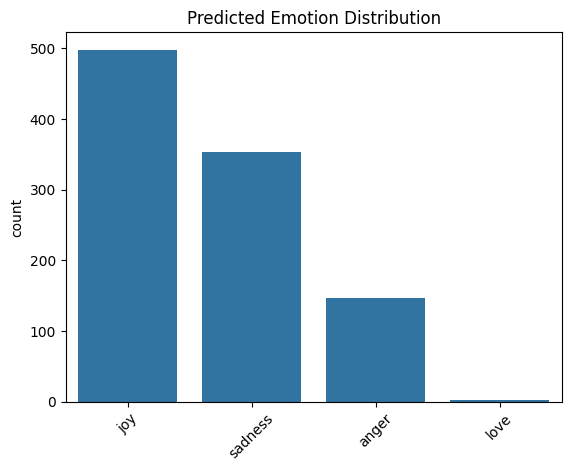

In [24]:
sns.countplot(x=y_pred)
plt.title("Predicted Emotion Distribution")
plt.xticks(rotation=45)

In [25]:
df_sample.shape

(5000, 5)